In [1]:
#Importing all packages and setting plots to be embedded inline:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tweepy
import json
import requests
import os
import re
%matplotlib inline

# Gathering

In this project, we will be gathering data with 3 different methods(Manual download,programmatical download and Twitter's Api).

In [2]:
#Loading twitter_archive dataset into a pandas dataframe:

df_twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Programmatical download through requests library and Loading image predictions into a pandas dataframe:

url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
    
df_predictions=pd.read_csv('image-predictions.tsv',sep='\t')  

In [4]:
#twitter api to get retweets and favorite counts for each tweet

consumer_key =''
consumer_secret =''
access_token =''
access_secret =''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
#list of tweets to save as txt file and errors list
tweets , err_list = [],[]

for i in df_twitter_archive.tweet_id.unique():
    try:
        tweet = api.get_status(i,tweet_mode = 'extended')
        tweets.append(tweet._json)
    except:
        err_list.append(i)

with open('tweet_json.txt',mode = 'w') as file:
    file.write('\n'.join(json.dumps(tweet) for tweet in tweets))

Rate limit reached. Sleeping for: 739
Rate limit reached. Sleeping for: 739


In [4]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []

with open('tweet_json.txt',mode = 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            # Append to list of dictionaries
            df_list.append({'tweet_id' : tweet['id'],
                           'retweeted' : tweet['retweeted'],
                           'retweet_count' : tweet['retweet_count'],
                           'favorite_count' : tweet['favorite_count']})
        except:
            print('error')     

In [5]:
#create a data frame from the appended list
df_api = pd.DataFrame(df_list)

# Assessing

## Visual Assessment

In [6]:
pd.set_option('display.max_colwidth',10000)
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

### Observation :

###### Quality Issues :

1."name" column contains values with none.

2.Few "name" contains names which are not names(a,an,the)

3.Html tags in the source column.

###### Tidiness Issues :

1.There are 4 columns for dog stage category("Doggo","floofer","pupper" and "puppo"). 4 columns can be reduced to 1 column. 


In [7]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Observation :

###### Quality Issues :

1.Some values in the predictions columns(ex:P1) are starting with uppercase letter and some with lowercase.

###### Tidiness Issues :

1.There are 3 columns for predictions.It can be reduced to one column

2.Similarly, there are 3 columns for the confidence.It can also be reduced to one column.

In [7]:
df_api

,favorite_count,retweet_count,retweeted,tweet_id
0,35242,7434,False,892420643555336193
1,30516,5527,False,892177421306343426
2,22944,3647,False,891815181378084864
3,38537,7612,False,891689557279858688
4,36815,8192,False,891327558926688256
5,18554,2747,False,891087950875897856
6,10801,1780,False,890971913173991426
7,59366,16627,False,890729181411237888
8,25540,3796,False,890609185150312448
9,29139,6436,False,890240255349198849


### Observation :
 
There are only 2331 rows in df_api but in df_twitter_archive there are 2356 tweets.

##### Tidiness Issues :

1.Should merge this table with df_twitter_archive,because they are from same observation unit.

## Programmatical Assesment

In [8]:
#overview of df_twitter_archive shape and composition:
print(df_twitter_archive.shape)
df_twitter_archive.info()

(2356, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), i

#### Observation :

###### Quality Issues :

1."Timestamp" column should be changed to datetime from object.

2.Missing values in retweet,in_reply and expanded_urls column.



In [9]:
#Descriptive statistics for numeric variables:

df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Observation :

The max value for "rating_numerator" and "rating_denominator" are high.Weratedogs follows unique rating system.They follow the convention of having denominator as 10 and numerator with higher values than denominator(ex: 11,12,13)

In [10]:
print(df_twitter_archive.rating_denominator.unique())
df_twitter_archive.rating_denominator.value_counts()

[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
#For viewing the full text of rating_denominator:
pd.set_option('display.max_colwidth',2000)
df_twitter_archive[df_twitter_archive.rating_denominator!=10][['text','rating_denominator']]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


#### Observation :

###### Quality Issues :
1.We can clearly observe that,few values are wrongly extracted for the rating_denominator column as there are other integer values in the text.(For Example,the text here is "@docmisterio account started on 11/15/15" the rating_denominator is 15).

2.In few instances,there are multiple scores because of multiple dogs in an image,so values of the denominators are summed up.

In [12]:
print(df_twitter_archive.rating_numerator.unique())
df_twitter_archive.rating_numerator.value_counts()

[  13   12   14    5   17   11   10  420  666    6   15  182  960    0   75
    7   84    9   24    8    1   27    3    4  165 1776  204   50   99   80
   45   60   44  143  121   20   26    2  144   88]


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
#For viewing the full text of rating_denominator:
pd.set_option('display.max_colwidth',5000)
df_twitter_archive[df_twitter_archive.rating_numerator >15][['text','rating_numerator']]

,text,rating_numerator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27


#### Observation :

###### Quality Issues :

1.We can observe that,few values are wrongly extracted for the rating_numerator column as there are other integer values in the text.

Example:
TEXT: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

Rating_numerator: 960

2.In few instances,there are multiple dogs in an image,so values of the numerators are summed up.

In [14]:
print(df_twitter_archive.tweet_id.duplicated().sum())#there are no duplicate tweetids.

0


In [15]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_predictions.jpg_url.duplicated().sum()

66

###### Quality Issues :
1.There are duplicate images in the predictions dataframe,which means there are retweets here also.While merging with df_twitter_archive these rows will be dropped.

In [18]:
df_predictions[(df_predictions.p1_dog ==False) & (df_predictions.p2_dog ==False) & (df_predictions.p3_dog ==False) ].shape

(324, 12)

###### Quality Issues :
There are 324 images which are not dogs in the df_preditions table.

In [19]:
print(df_api.tweet_id.duplicated().sum()) #there are no duplicate tweetids.

0


In [20]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
retweeted         2331 non-null bool
tweet_id          2331 non-null int64
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [21]:
print(df_api.tweet_id.duplicated().sum())#there are no duplicate tweetids.

0


## Assessing Summary :

### Quality Issues:

#### df_twitter_archive:

1.Few "name" column values contains names which are not correct names(a,an,the).

2."name" column contains values with none.

3.Html tags in the source column.

4."Timestamp" column should be changed to datetime from object.

5.We need only orginal tweets.There are values in retweets and missing values in expanded_urls column.

6.We can clearly observe that,few values are wrongly extracted for the rating_denominator column as there are other integer values in the text.In few instances,there are multiple scores because of multiple dogs in an image,so values of the denominators are summed up.

7.We can observe that,few values are wrongly extracted for the rating_numerator column as there are other integer values in the text.In few instances,there are multiple dogs in an image,so values of the numerators are summed up.

#### df_predictions:

1.Some values in the predictions columns(ex:P1) are starting with uppercase letter and some with lowercase.

2.There are duplicate images in the predictions dataframe,which means there are retweets here also.While merging with df_twitter_archive these rows will be dropped.

3.There are images which are not dogs.


#### df_twitter_api:

No issues.



### Tidiness Issues:

#### df_twitter_archive:

1.There are 4 columns for dog stage category("Doggo","floofer","pupper" and "puppo"). 4 columns can be reduced to 1 column. 


#### df_predictions:

1.Predictions should be a part of df_twitter_archive table.

2.There are 3 columns for predictions.It can be reduced to one column

3.Similarly, there are 3 columns for the confidence.It can also be reduced to one column.


#### df_twitter_api:

1.Should merge this table with df_twitter_archive,because they are from same observation unit.





# Cleaning

Before cleaning,let's create copies of all the three dataframes.

In [22]:
df_twitter_archive_clean=df_twitter_archive.copy()
df_predictions_clean=df_predictions.copy()
df_api_clean=df_api.copy()

#### Define

Remove retweets and replies as we want only orginal tweets.

#### Code

In [23]:
df_twitter_archive_clean=df_twitter_archive_clean[(df_twitter_archive_clean['in_reply_to_status_id'].isnull()) & (df_twitter_archive_clean['retweeted_status_id'].isnull())]
df_twitter_archive_clean.dropna(axis=1,how='all',inplace=True)

#### Test

In [24]:
df_twitter_archive_clean.info() #All columns except expanded_urls dont have missing data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define

Should remove rows which have images which are not dogs.

#### Code

In [25]:
df_predictions_clean=df_predictions_clean[~((df_predictions_clean.p1_dog==False) & \
                                            (df_predictions_clean.p2_dog==False) & \
                                            (df_predictions_clean.p2_dog==False))]


#### Test

In [26]:
df_predictions_clean[(df_predictions_clean.p1_dog==False) & (df_predictions_clean.p2_dog==False) & \
                     (df_predictions_clean.p2_dog==False)]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [27]:
#We can remove p1_dog,p2_dog,p3_dog cloumns as all are dogs:

df_predictions_clean.drop(['p1_dog','p2_dog','p3_dog'],axis=1,inplace=True)
print(df_predictions_clean.shape)
df_predictions_clean.head(1)

(1687, 9)


,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428


In [28]:
df_twitter_archive_clean.head(15)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitt

#### Define

Drop p2,p2_conf,p3,p3_conf as there are no false predictions.Renaming p1 and p1_conf to prediction and confidence

#### Code

In [29]:
df_predictions_clean.drop(['p2','p2_conf','p3','p3_conf'],axis=1,inplace=True)
df_predictions_clean.rename(columns={'p1':'prediction','p1_conf':'confidence'},inplace=True)

#### Test

In [30]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1687 non-null int64
jpg_url       1687 non-null object
img_num       1687 non-null int64
prediction    1687 non-null object
confidence    1687 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 79.1+ KB


#### Define

Creating a new column 'Dog_stage' for dog category instead of 4 columns.

#### Code

In [31]:
def dog_stage(df):
    stages=df[['doggo','floofer','pupper','puppo']].values
    row=''
    if 'pupper' in stages:
        row=row+'pupper, '
    if 'doggo' in stages:
        row=row+'doggo, '
    if 'floofer' in stages:
        row=row+'floofer, '
    if 'puppo' in stages:
        row=row+'puppo, '
    if row=='':
        return np.nan
    else:
        return row[:-2]
    
df_twitter_archive_clean['dog_stage']=df_twitter_archive_clean.apply(dog_stage,axis=1)
df_twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

    

#### Test

In [32]:
df_twitter_archive_clean.dog_stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
pupper, doggo       9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

#### Define

Merge df_predictions_clean with df_twitter_archive_clean

#### Code

In [33]:
final_df=df_twitter_archive_clean.merge(df_predictions_clean,on='tweet_id',how='inner')

#### Test

In [34]:
final_df.shape

(1606, 13)

#### Define

Merge df_api_clean with final_df

#### Code

In [35]:
final_df=final_df.merge(df_api_clean,on='tweet_id',how='inner')

#### Test

In [36]:
final_df.shape

(1599, 16)

In [37]:
final_df.retweeted.value_counts()

False    1599
Name: retweeted, dtype: int64

In [38]:
final_df.drop('retweeted',axis=1,inplace=True) #dropping retweets

In [39]:
final_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction,confidence,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,30516,5527


In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 15 columns):
tweet_id              1599 non-null int64
timestamp             1599 non-null object
source                1599 non-null object
text                  1599 non-null object
expanded_urls         1599 non-null object
rating_numerator      1599 non-null int64
rating_denominator    1599 non-null int64
name                  1599 non-null object
dog_stage             249 non-null object
jpg_url               1599 non-null object
img_num               1599 non-null int64
prediction            1599 non-null object
confidence            1599 non-null float64
favorite_count        1599 non-null int64
retweet_count         1599 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 199.9+ KB


#### Define

Convert datatype of timetamp from string to datetime

#### Code

In [41]:
final_df.timestamp=pd.to_datetime(final_df.timestamp)

#### Test

In [42]:
print(final_df.timestamp.dtype)

datetime64[ns]


#### Define

There are few names which are actually not correct names.

#### Code

In [43]:
final_df.name.unique()

not_names=['a','an','the','my']

final_df['name']=final_df['name'].apply(lambda x: x if x not in not_names else 'None')

#### Test

In [44]:
final_df.name.value_counts()

None         440
Cooper        10
Charlie        9
Oliver         9
Tucker         9
Lucy           8
Penny          8
Daisy          7
Winston        7
Sadie          7
Jax            6
Lola           6
Toby           6
Koda           6
Leo            5
Bo             5
Rusty          5
Oscar          5
Stanley        5
Bella          5
Bentley        4
Larry          4
Louis          4
George         4
Dexter         4
Maggie         4
Gus            4
Sophie         4
Bear           4
Dave           4
            ... 
Patch          1
Marq           1
Griswold       1
Brady          1
Kyro           1
Dotsy          1
Antony         1
Dobby          1
Alfy           1
Skye           1
Glacier        1
Hero           1
Jennifur       1
Pepper         1
Karma          1
Kaiya          1
Heinrich       1
Boots          1
Milky          1
Rolf           1
Timber         1
Brooks         1
Sojourner      1
Gunner         1
Remy           1
Penelope       1
Fizz           1
Maude         

#### Define

Replace names with none with np.nan

#### Code

In [45]:
final_df.name=final_df.name.replace('None',np.nan)

#### Test

In [46]:
final_df.name.value_counts()

Cooper       10
Charlie       9
Tucker        9
Oliver        9
Lucy          8
Penny         8
Winston       7
Sadie         7
Daisy         7
Koda          6
Lola          6
Jax           6
Toby          6
Oscar         5
Stanley       5
Bo            5
Bella         5
Leo           5
Rusty         5
Brody         4
Jack          4
Larry         4
Gus           4
Sophie        4
Dave          4
Dexter        4
Bear          4
Duke          4
Louis         4
Cassie        4
             ..
Patch         1
Marq          1
Griswold      1
Brady         1
Kyro          1
Dotsy         1
Antony        1
Dobby         1
Alfy          1
Skye          1
Glacier       1
Hero          1
Jennifur      1
Pepper        1
Karma         1
Kaiya         1
Heinrich      1
Boots         1
Milky         1
Rolf          1
Timber        1
Brooks        1
Sojourner     1
Gunner        1
Remy          1
Penelope      1
Fizz          1
Maude         1
Saydee        1
Trigger       1
Name: name, Length: 820,

#### Define

Duplicate images in df_predictions table.These will be removed when we merge it with df_twitter_archive_clean table

#### Test

In [47]:
final_df.jpg_url.duplicated().sum()

0

#### Define

In source column,we need to extract only the source from the html code

#### Code

In [48]:
pd.set_option('display.max_colwidth',5000)
final_df.source.head(2)

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

#### Test

In [49]:
final_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1570
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       21
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

#### Define

Converting name and prediction columns to lower case

#### Code

In [50]:
final_df.name=final_df.name.str.lower()
final_df.prediction=final_df.prediction.str.lower()

#### Test

In [51]:
final_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction,confidence,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,30516,5527


#### Define

We can clearly observe that,few values are wrongly extracted for the rating_denominator column as there are other integer values in the text.In few instances,there are multiple scores because of multiple dogs in an image,so values of the denominators are summed up.

#### Code

In [52]:
def extract_denom(x):
    if len(x)==2:
        if int(x[0][0].split('/')[1])%10 == 0:
            return int(x[0][0].split('/')[1])
        else:
            return int(x[1][0].split('/')[1])
    else:
        return int(x[0][0].split('/')[1])

In [53]:
final_df.rating_denominator = \
final_df.text.apply(lambda x : re.findall("(\d+(\.\d+)?\/\d+(\.\d+)?)",x)).apply(extract_denom)

In [54]:
final_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction,confidence,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,30516,5527


#### Test

In [55]:
final_df.rating_denominator.value_counts() 

10     1587
50        3
80        2
150       1
110       1
90        1
70        1
40        1
20        1
7         1
Name: rating_denominator, dtype: int64

#### Define

We can observe that,few values are wrongly extracted for the rating_numerator column as there are other integer values in the text.In few instances,there are multiple dogs in an image,so values of the numerators are summed up.

#### Code

In [56]:
def extract_num(x):
    if len(x)==2:
        if int(x[0][0].split('/')[1])%10 == 0:
            return float(x[0][0].split('/')[0])
        else:
            return float(x[1][0].split('/')[0])
    else:
        return float(x[0][0].split('/')[0])

In [57]:
final_df.rating_numerator = \
final_df.text.apply(lambda x : re.findall("(\d+(\.\d+)?\/\d+(\.\d+)?)",x)).apply(extract_num)

#### Test

In [58]:
final_df.rating_numerator.unique()

array([  13.  ,   12.  ,   14.  ,   13.5 ,   11.  ,    6.  ,    0.  ,
         10.  ,   84.  ,   24.  ,    9.75,    5.  ,   11.27,    3.  ,
          9.  ,    8.  ,    7.  ,  165.  ,    4.  ,   50.  ,   99.  ,
         80.  ,   45.  ,   60.  ,   44.  ,  121.  ,   11.26,    2.  ,   88.  ])

In [59]:
final_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction,confidence,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,30516,5527
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,22944,3647


#### Master Dataset

In [60]:
final_df.to_csv('twitter_archive_master.csv',index=False)

## Data Analysis And Visualization

#### Imposed Questions:

1.Which is the most popular dog stage?

2.What are the top 10 dog breeds?

3.What is the relationship between retweets and favourites?

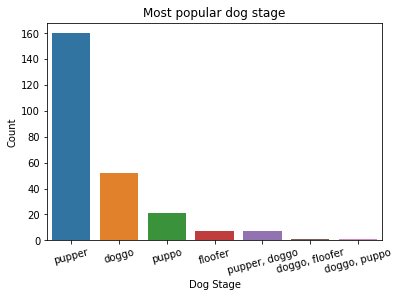

In [61]:
order=final_df['dog_stage'].value_counts().index
sb.countplot(data=final_df,x='dog_stage',order=order);
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.title('Most popular dog stage');
plt.xticks(rotation=15);

The most popular dog stage is the pupper,followed then is doggo.

In [62]:
final_df.prediction.value_counts().head(5).sum()/final_df.prediction.value_counts().sum()

0.28080050031269543

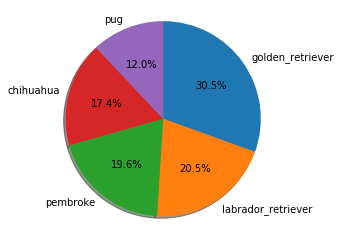

In [63]:
top_5=final_df.prediction.value_counts().head(5)
plt.pie(top_5,labels=top_5.index,startangle=90,counterclock=False,autopct='%1.1f%%',shadow=True)
plt.axis('square');

Almost,40% of the breeds are from the top 10.The top most breed among them is the golden retreiver.

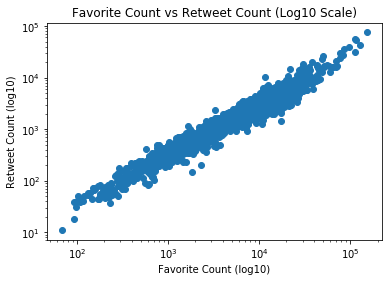

In [64]:
plt.scatter(final_df['favorite_count'], final_df['retweet_count'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Favorite Count (log10)')
plt.ylabel('Retweet Count (log10)')
plt.title('Favorite Count vs Retweet Count (Log10 Scale)');

In [65]:
correlation=final_df['favorite_count'].corr(final_df['retweet_count'])
correlation

0.9292694411186786

We can observe that there is a very strong positive correlation between favorite counts and retweet counts.The correlation between the two is 0.93.

## Summary & Conclusions

In this project,We have gathered data with  3 different sources:
1)Manual download;
2)Programmatical download and
3)Twitter Api.

Then the data is imported into separate dataframes.Virtual and programmatical assesment is done.There are few Quality issues and tidiness issues.They have been cleaned using python and pandas.

Imposed Questions and Answers:

1.Which is the most popular dog stage?

There are almost 1350 none values for the dog stage.Among the given values,pupper is the most popular dog stage.Then follows doggo,puppo and floofer.

2.What are the top 5 dog breeds?

There are many breeds in our data.The top 5 breeds are golden_retriever,labrador_retriever,pembroke,chihuahua and pug.These 5 breeds almost constitute 29% of all the dog breeds.

3.What is the realtionship between retweets and favourites?

Retweet count and favorite counts share a strong positive correlation. Their correlation coeffecient is 0.93.
This shows that if a tweet has a higher favorite count,then the retweet count is also higher and vice versa.